In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import sklearn as sk
import sklearn.linear_model
import os

import PlaceCellAnalysis as pc
import utilities as u
import preprocessing as pp
import behavior as b
import BayesianDecoding as bd

os.sys.path.append("C:\\Users\\mplitt\\MightyMorphingPhotonRangers\\CensoredLstsq")
os.sys.path.append("")

%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
# mice = ['4139190.1','4139190.3','4139212.2','4139219.2','4139219.3','4139224.2','4139224.3','4139224.5']
df = pp.load_session_db()
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])

G:\My Drive\VR_Data\TwoTower\behavior.sqlite


In [4]:
mouse = '4139265.3'
df_mouse = df[df['MouseName'].str.match(mouse)]
df_mouse = df_mouse[df_mouse['Track'].str.match('TwoTower_noTimeout') | df_mouse['Track'].str.match('TwoTower_Timeout')|
                   df_mouse['Track'].str.match('TwoTower_foraging')]

sess = df_mouse.iloc[-1]
print(sess['data file'])

G:\My Drive\VR_Data\TwoTower\4139265.3\24_02_2019\TwoTower_foraging_2.sqlite


In [23]:
VRDat,C, S, A = pp.load_scan_sess(sess,fneu_coeff=0)
#C = sp.stats.zscore(C,axis=0)
cmax = np.mean(S,axis=0)
print(cmax.shape)
S= np.divide(S,np.dot(np.ones([C.shape[0],1]),cmax[np.newaxis,:]))


num aberrant ttls 0.0
32038 (32038,) (32038, 21) 105022


C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


frame diff 0
(1634,)


In [24]:
trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
#S_trial_mat, occ, edges, centers = u.make_pos_bin_trial_matrices(S,VRDat.pos._values,tstart_inds,teleport_inds)
S_trial_mat, occ, edges, centers = u.make_pos_bin_trial_matrices(S,VRDat.pos._values,tstart_inds,teleport_inds,bin_size=10)
#C_trial_mat = np.nanmean(C_trial_mat,axis=1)

In [25]:
np.isnan(S_trial_mat).sum()

0

In [26]:
print(S_trial_mat.shape)

(120, 45, 1634)


In [27]:

S_trial_Ncat = np.reshape(S_trial_mat[:,:,:],[S_trial_mat.shape[0],-1])

In [11]:
print(S_trial_Ncat.shape)

(120, 73530)


In [12]:
from cv import masked_pca

In [16]:
U,Vt,train_err = masked_pca(np.copy(S_trial_Ncat),6,nonneg=True)

0 41.49733
1 40.84306
2 40.533684
3 40.37832
4 40.27789
5 40.222637
6 40.192978
7 40.171883
8 40.15399
9 40.138504
10 40.12437
11 40.109764
12 40.094593
13 40.080616
14 40.06949
15 40.06141
16 40.055607
17 40.051357
18 40.048145
19 40.045628
20 40.04352
21 40.041702
22 40.040016
23 40.03835
24 40.03658
25 40.034645
26 40.03255
27 40.03032
28 40.02796
29 40.025482
30 40.022934
31 40.020313
32 40.017597
33 40.014862
34 40.012146
35 40.00962
36 40.007256
37 40.005203
38 40.00344
39 40.00199
40 40.00083
41 39.999912
42 39.99923
43 39.99869
44 39.998325
45 39.998062
46 39.997837
47 39.99771
48 39.997593
49 39.997513


In [15]:
from numpy import matlib


0.0 3170.038097922698
0.0 4883.28173828125


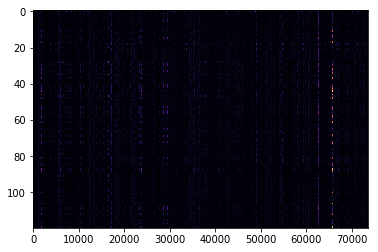

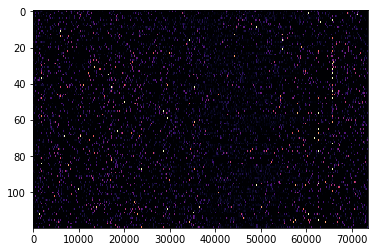

In [22]:
f,ax = plt.subplots()
ax.imshow(np.dot(U,Vt)/4000,aspect='auto',cmap='magma',vmin=0,vmax=.1)
print(np.dot(U,Vt).min(),np.dot(U,Vt).max())
f,ax = plt.subplots()
ax.imshow(S_trial_Ncat/4000,aspect='auto',cmap='magma',vmin=0,vmax=.1)
print(S_trial_Ncat.ravel().min(),S_trial_Ncat.ravel().max())

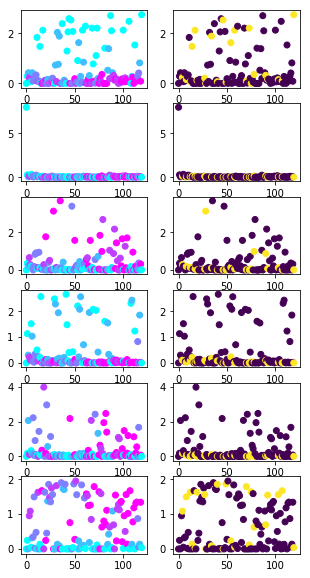

In [18]:
f,ax = plt.subplots(U.shape[1],2,figsize=[5,10])
for factor in range(U.shape[1]):
    ax[factor,0].scatter(np.arange(120),U[:,factor],c=trial_info['morphs'],cmap='cool')
    ax[factor,1].scatter(np.arange(120),U[:,factor],c=trial_info['rewards']+2*trial_info['omissions'],cmap='viridis')
    #ax[factor].set_ylim([0,2])

(120, 45, 1634)
(120,)
[ 0.00000000e+00  0.00000000e+00  1.45519152e-11 -1.45519152e-11
  0.00000000e+00  0.00000000e+00  1.45519152e-11 -2.91038305e-11
  2.91038305e-11 -1.45519152e-11  0.00000000e+00 -1.45519152e-11
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.45519152e-11
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.91038305e-11
 -2.91038305e-11 -1.45519152e-11 -2.91038305e-11 -1.45519152e-11
  1.45519152e-11 -1.45519152e-11 -1.45519152e-11  0.00000000e+00
  0.00000000e+00 -1.45519152e-11  2.91038305e-11  0.00000000e+00
  2.91038305e-11 -1.45519152e-11 -1.45519152e-11  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.45519152e-11 -1.45519152e-11  1.45519152e-11
  0.00000000e+00  0.00000000e+00  1.45519152e-11  0.00000000e+00
 -1.45519152e-11  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.45519152e-11  2.91038305e-11 -1.45519152e-11  1.45519152e-11
 -1.45519152e-11  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -

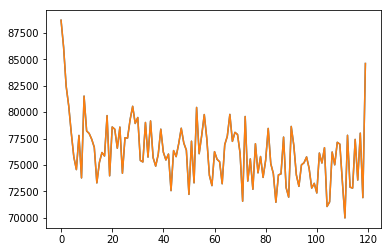

In [29]:
print(S_trial_mat.shape)
trialAct=np.nansum(np.nansum(S_trial_mat,axis=-1),axis=-1)
print(trialAct.shape)
f,ax = plt.subplots()
ax.plot(trialAct)
ax.plot(np.nansum(S_trial_Ncat,axis=-1))
print(trialAct-np.nansum(S_trial_Ncat,axis=-1))

In [30]:
os.sys.path.append("C:\\Users\\mplitt\\nmftools-master\\nmftools")
import ensemble as nmf


In [32]:
data = np.copy(S_trial_Ncat)
u,vt,train_err = masked_pca(data,50,nonneg=False)


0 2.707616


KeyboardInterrupt: 

In [ ]:
reslist = []
for r in range(50):
    print(r)
    resid = np.memmap(os.path.join("E:\\","resid.dat"),dtype='float32',mode='r+',shape=tuple(data.shape))
    resid = np.dot(u[:, :r], vt[:r,:])-data
    resid = np.sqrt(np.nanmean(resid**2))
    reslist.append(resid)
#     results[r]['svd_rmse'] = resid

In [ ]:
f,ax = plt.subplots()
ax.plot(reslist)

In [33]:
results = nmf.fit_ensemble_masked(np.copy(S_trial_Ncat),np.arange(1,10),n_replicates=5)

  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

replicate 0
0 3.5975604
1 3.5935972
2 3.5935664
3 3.5935645
4 3.5935657
5 3.5935662
6 3.5935655
7 3.5935655
8 3.5935655
9 3.5935657
10 3.5935657
11 3.5935657
12 3.5935657
13 3.5935657
14 3.5935657


KeyboardInterrupt: 

In [11]:
import plots 

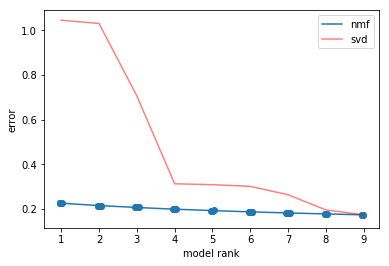

In [12]:
plots.plot_rmse(results)

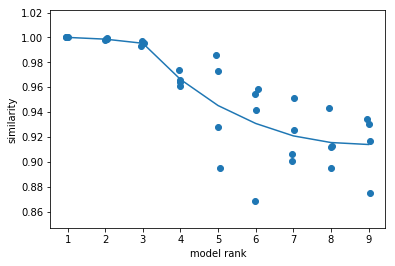

In [13]:
plots.plot_similarity(results)

In [17]:
print(results.keys())
rank = 3

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9])


In [18]:
U,Vt = results[rank]['factors'][0][0],results[rank]['factors'][0][1]

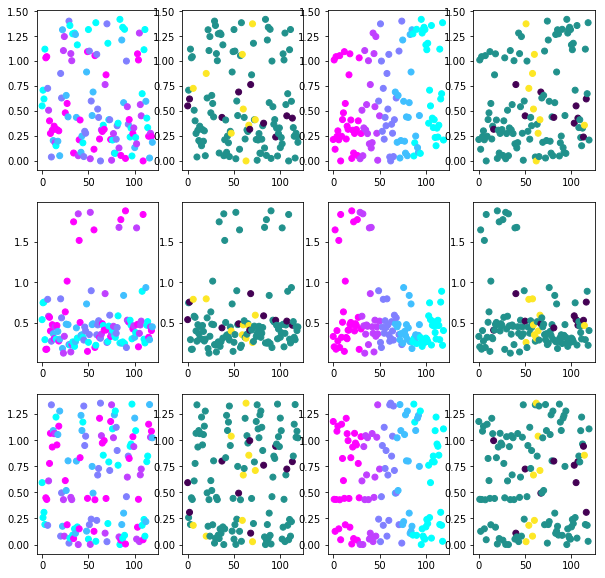

In [19]:
f,ax = plt.subplots(U.shape[1],4,figsize=[10,10])
# ff,aax = plt.subplots(U.shape[1],1,figsize=[5,10])
sort = np.argsort(trial_info['morphs']+trial_info['bckgndJitter']+trial_info['wallJitter']+trial_info['towerJitter'])
for factor in range(U.shape[1]):
    ax[factor,0].scatter(np.arange(120),U[:,factor],c=1-trial_info['morphs'],cmap='cool')
    ax[factor,1].scatter(np.arange(120),U[:,factor],c=trial_info['rewards']+2*trial_info['omissions'],cmap='viridis')
    ax[factor,2].scatter(np.arange(120),U[sort,factor],c=1-trial_info['morphs'][sort],cmap='cool')
    ax[factor,3].scatter(np.arange(120),U[sort,factor],c=trial_info['rewards'][sort]+2*trial_info['omissions'][sort],cmap='viridis')

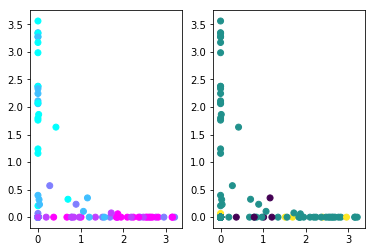

In [61]:
f,ax = plt.subplots(1,2)
ax[0].scatter(U[:,0],U[:,1],c=trial_info['morphs'],cmap='cool')
ax[1].scatter(U[:,0],U[:,1],c=trial_info['rewards']+2*trial_info['omissions'],cmap='viridis')

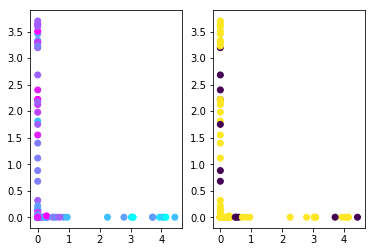

In [48]:
f,ax = plt.subplots(1,2)
ax[0].scatter(U[1:,0],U[1:,1],c=trial_info['morphs'][1:]-trial_info['morphs'][0:-1],cmap='cool')
ax[1].scatter(U[1:,0],U[1:,1],c=trial_info['rewards'][0:-1],cmap='viridis')

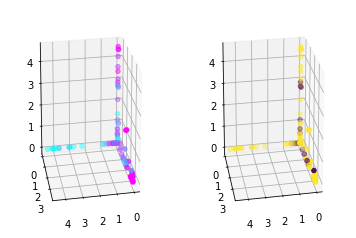

In [49]:
from mpl_toolkits.mplot3d import Axes3D
f= plt.figure()
ax=f.add_subplot(121,projection='3d')
ax.scatter(U[:,0],U[:,1],U[:,3],c=trial_info['morphs'],cmap='cool')
ax.view_init(20,80)

ax=f.add_subplot(122,projection='3d')
ax.scatter(U[:,0],U[:,1],U[:,3],c=trial_info['rewards'],cmap='viridis')
ax.view_init(20,80)

0.32281564999120377 4.622904249293909
0.38120914360123775 6.0322299784728095


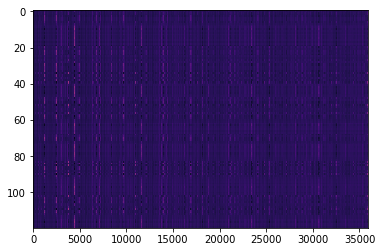

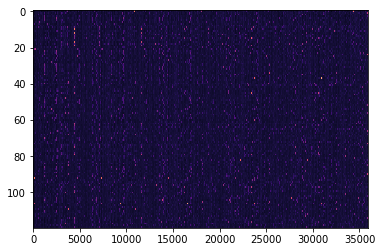

In [20]:
f,ax = plt.subplots()

ax.imshow(np.dot(U,Vt),aspect='auto',cmap='magma')
print(np.dot(U,Vt).min(),np.dot(U,Vt).max())
f,ax = plt.subplots()
ax.imshow(C_trial_Ncat,aspect='auto',cmap='magma')
print(C_trial_Ncat.ravel().min(),C_trial_Ncat.ravel().max())

In [63]:
np.isnan(C_trial_Ncat).sum()

87984

In [64]:
print(U.shape)

(120, 4)


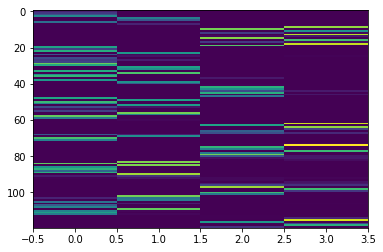

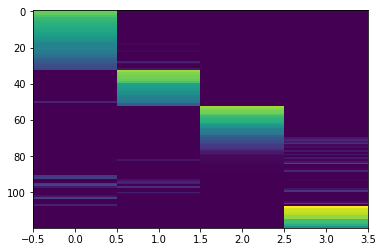

In [65]:
import sklearn.cluster
import sklearn.metrics
import scipy.cluster.hierarchy as sch

D = sk.metrics.pairwise_distances(U)


km = sk.cluster.KMeans(n_clusters=rank).fit(U)

order = []
for col in range(U.shape[1]):

    # arg sort by column value, descending
    colorder = np.flip(np.argsort(U[:,col]),axis=0)
#     print(km.labels_[colorder])
    lbl = km.labels_[colorder[0]]
#     print(lbl)
#     print(U[colorder,col])
#     print(colorder[km.labels_[colorder]==lbl])
#     print(U[colorder[km.labels_[colorder]==lbl],col])
    # find all labels that have the same as first index
    order.extend(colorder[km.labels_[colorder]==lbl])
    

    

# centroids = np.linalg.norm(km.cluster_centers_-km.cluster_centers_[0,:],axis=1)
# # centroids = centroids-centroids[0]
# colOrder=np.argsort(centroids)
# inds = np.argsort(km.labels_)

f,ax = plt.subplots()
ax.imshow(U,aspect='auto')

# order = np.flip(np.argsort(U[:,0]),axis=0)
Uk=U[order,:]
# Ukc = Uk[:,colOrder]
f,ax = plt.subplots()
ax.imshow(Uk,aspect='auto')

In [66]:
Vmat = np.reshape(Vt,[rank,C_trial_mat.shape[1],C_trial_mat.shape[2]])

C:\Users\mplitt\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
C:\Users\mplitt\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
C:\Users\mplitt\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


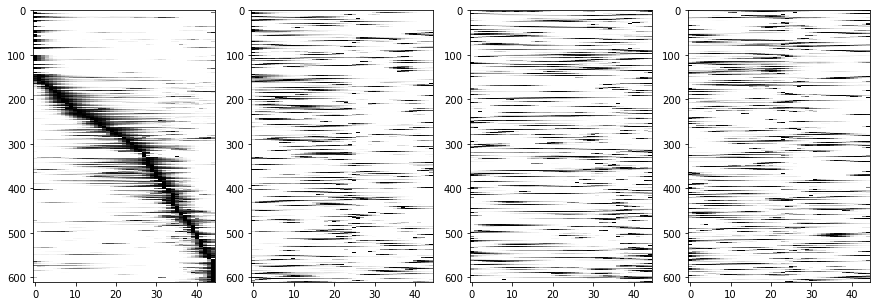

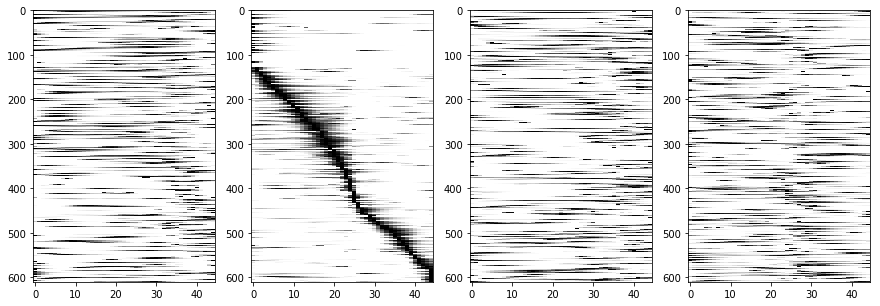

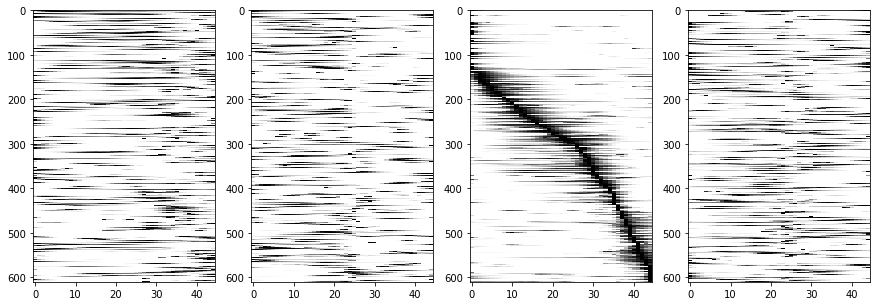

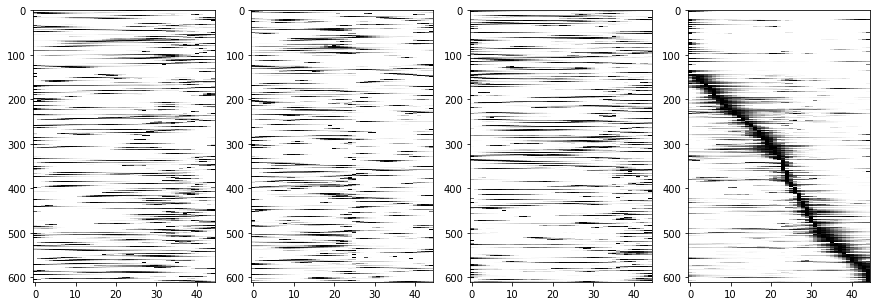

In [67]:
getSort = lambda fr : np.argsort(np.argmax(fr,axis=0))
#factorOrder = [0,1,3,2,4]
for k in range(rank):
    fr_k = np.squeeze(Vmat[k,:,:])
    for col in range(fr_k.shape[1]):
        fr_k[:,col]/=fr_k[:,col].max()
    f,ax = plt.subplots(1,rank,figsize=[15,5])
    sort = getSort(fr_k)
    for j in range(rank):
        fr_j = np.squeeze(Vmat[j,:,:])
        for col in range(fr_j.shape[1]):
            fr_j[:,col]/=fr_j[:,col].max()
            
        ax[j].imshow(fr_j[:,sort].T,cmap='Greys',aspect='auto')
#     fr_ks = fr_k[:,getSort(fr_k)]
#     ax.imshow(fr_ks.T,cmap='Greys',aspect='auto')